### Internal waves radiating from the bay

In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
from scipy import signal
import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
bathy_file1 = '/Volumes/KYUUBI/SVB/04_320x456x100/01_base/gridGlob.nc'
state_file1 = '/Volumes/KYUUBI/SVB/04_320x456x100/02_w_drag/dynVarsGlob.nc'

In [6]:
with Dataset(bathy_file1, 'r') as nbl:
    lat = nbl.variables['Y'][:]
    lon = nbl.variables['X'][:]
    Z = nbl.variables['Z'][:]
    Zl = nbl.variables['Zl'][:]
    depth = nbl.variables['Depth'][:]
    # centers mask
    hFacC = nbl.variables['HFacC'][:]
    hfac = np.ma.masked_values(hFacC, 0)
    mask = np.ma.getmask(hfac)
    # U mask
    #hFacW = nbl.variables['HFacW'][:]
    #hfacW = np.ma.masked_values(hFacW, 0)
    #maskU = np.ma.getmask(hfacW)
    # V mask
    #hFacS = nbl.variables['HFacS'][:]
    #hfacS = np.ma.masked_values(hFacS, 0)
    #maskV = np.ma.getmask(hfacS)
    # masked depth
    dep_masked = np.ma.masked_values(depth,0)
    mask_dep = np.ma.getmask(dep_masked)
with Dataset(state_file1, 'r') as nbl:
    Zind = (nbl.variables['diag_levels'][:]).astype(int)

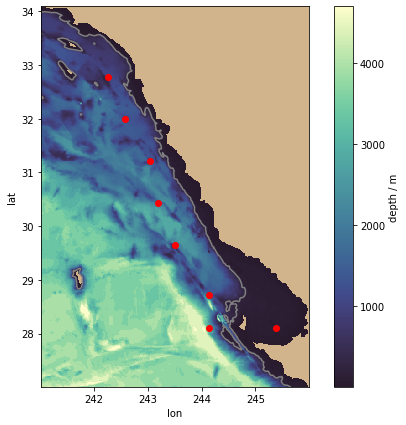

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120
lon_inds = [280,200,200,160,140,130,100,80]
lat_inds = [lat_ind1,lat_ind1, 110, lat_ind2+50,
            lat_ind2+100, lat_ind2+150, lat_ind2+200, lat_ind2+250]
# ssh transects
ax.plot(lon[lon_inds[0]],lat[lat_inds[0]],'ro')
ax.plot(lon[lon_inds[1]],lat[lat_inds[1]],'ro')
ax.plot(lon[lon_inds[2]],lat[lat_inds[2]],'ro')
ax.plot(lon[lon_inds[3]],lat[lat_inds[3]],'ro')
ax.plot(lon[lon_inds[4]],lat[lat_inds[4]],'ro')
ax.plot(lon[lon_inds[5]],lat[lat_inds[5]],'ro')
ax.plot(lon[lon_inds[6]],lat[lat_inds[6]],'ro')
ax.plot(lon[lon_inds[7]],lat[lat_inds[7]],'ro')

cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

Text(0.5, 0, 'Time / hr')

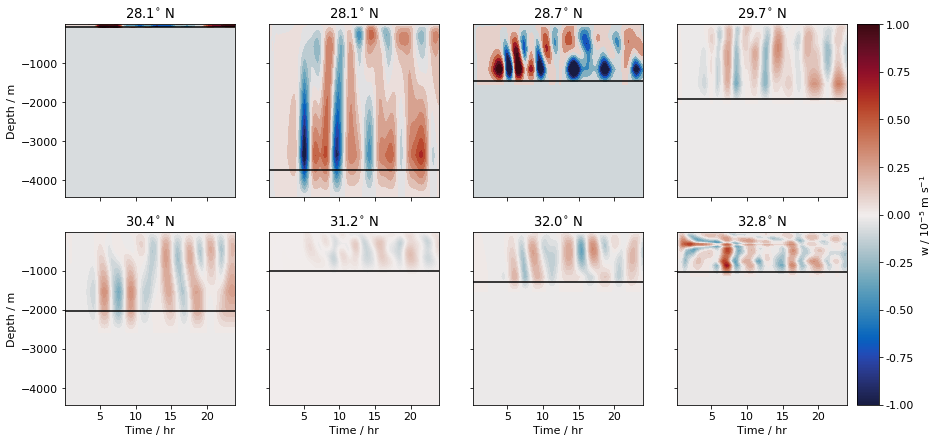

In [7]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(14,7),
                                                          sharex=True,sharey=True)
plt.rcParams.update({'font.size': 11})

with Dataset(state_file1, 'r') as nbl:
    wvel1h = nbl.variables['WVEL'][:,:,lat_inds[0], lon_inds[0]]
    time = nbl.variables['T'][:]
    wvel2h = nbl.variables['WVEL'][:,:,lat_inds[1], lon_inds[1]]
    wvel3h = nbl.variables['WVEL'][:,:,lat_inds[2], lon_inds[2]]
    wvel4h = nbl.variables['WVEL'][:,:,lat_inds[3], lon_inds[3]]
    wvel5h = nbl.variables['WVEL'][:,:,lat_inds[4], lon_inds[4]]
    wvel6h = nbl.variables['WVEL'][:,:,lat_inds[5], lon_inds[5]]
    wvel7h = nbl.variables['WVEL'][:,:,lat_inds[6], lon_inds[6]]
    wvel8h = nbl.variables['WVEL'][:,:,lat_inds[7], lon_inds[7]]

ax1.contourf(time/3600,Zl[Zind],np.transpose(wvel1h*1E5),20,vmin=-1, vmax=1,cmap=cmo.cm.balance)
ax2.contourf(time/3600,Zl[Zind],np.transpose(wvel2h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax3.contourf(time/3600,Zl[Zind],np.transpose(wvel3h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
cb = ax4.contourf(time/3600,Zl[Zind],np.transpose(wvel4h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax5.contourf(time/3600,Zl[Zind],np.transpose(wvel5h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax6.contourf(time/3600,Zl[Zind],np.transpose(wvel6h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax7.contourf(time/3600,Zl[Zind],np.transpose(wvel7h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax8.contourf(time/3600,Zl[Zind],np.transpose(wvel8h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                 cax=cbar_ax, orientation='vertical', 
                 format='%1.2f',label='w / 10$^{-5}$ m s$^{-1}$')

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind,ind_lon, ax in zip(lat_inds, lon_inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])
    ax.axhline(-depth[ind,ind_lon], color='k')
ax1.set_ylabel('Depth / m')
ax5.set_ylabel('Depth / m')
ax5.set_xlabel('Time / hr')
ax6.set_xlabel('Time / hr')
ax7.set_xlabel('Time / hr')
ax8.set_xlabel('Time / hr')

Text(0.5, 0, 'Time / hr')

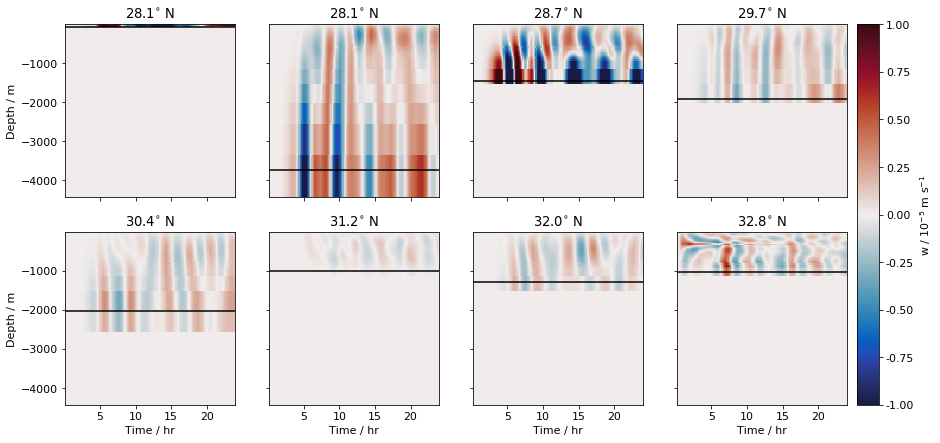

In [9]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(14,7),
                                                          sharex=True,sharey=True)
plt.rcParams.update({'font.size': 11})

ax1.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel1h*1E5),vmin=-1, vmax=1,cmap=cmo.cm.balance)
ax2.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel2h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax3.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel3h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
cb = ax4.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel4h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax5.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel5h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax6.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel6h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax7.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel7h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax8.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel8h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                 cax=cbar_ax, orientation='vertical', 
                 format='%1.2f',label='w / 10$^{-5}$ m s$^{-1}$')

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind,ind_lon, ax in zip(lat_inds, lon_inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])
    ax.axhline(-depth[ind,ind_lon], color='k')
ax1.set_ylabel('Depth / m')
ax5.set_ylabel('Depth / m')
ax5.set_xlabel('Time / hr')
ax6.set_xlabel('Time / hr')
ax7.set_xlabel('Time / hr')
ax8.set_xlabel('Time / hr')

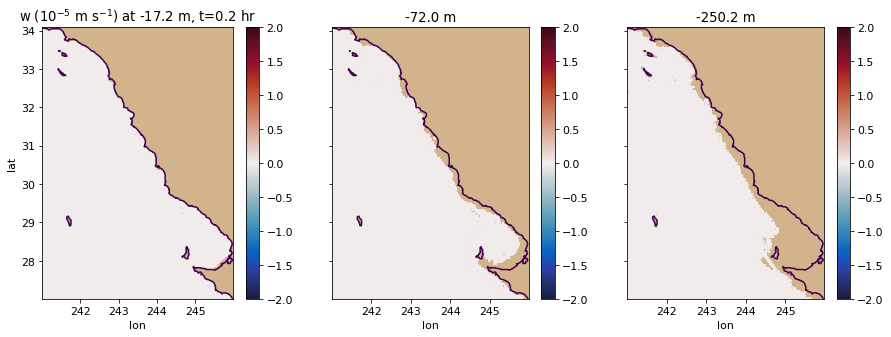

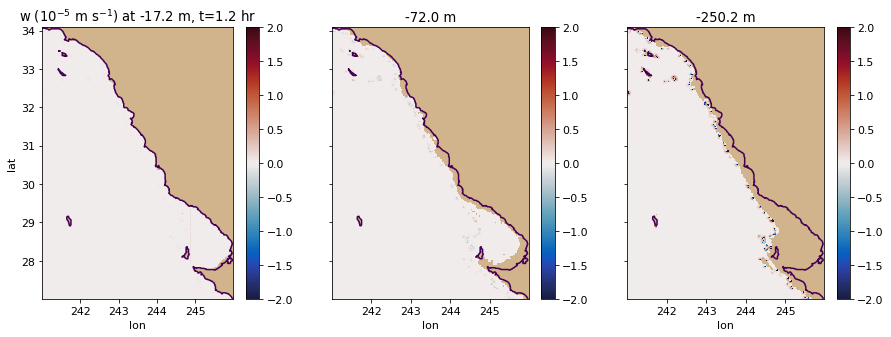

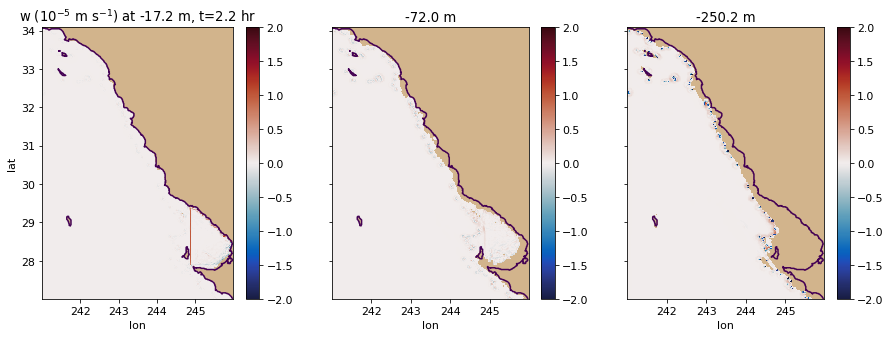

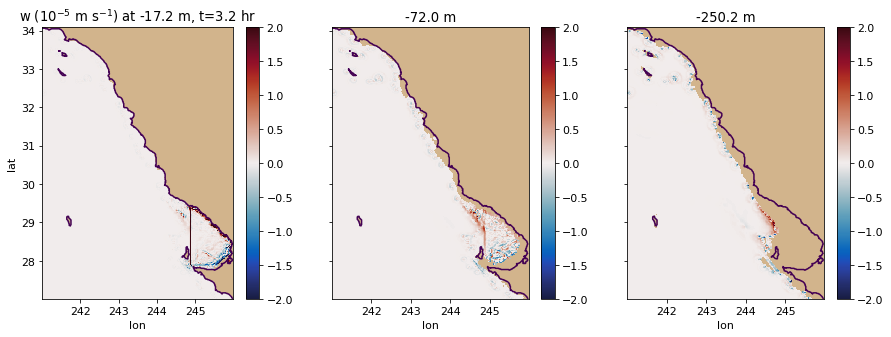

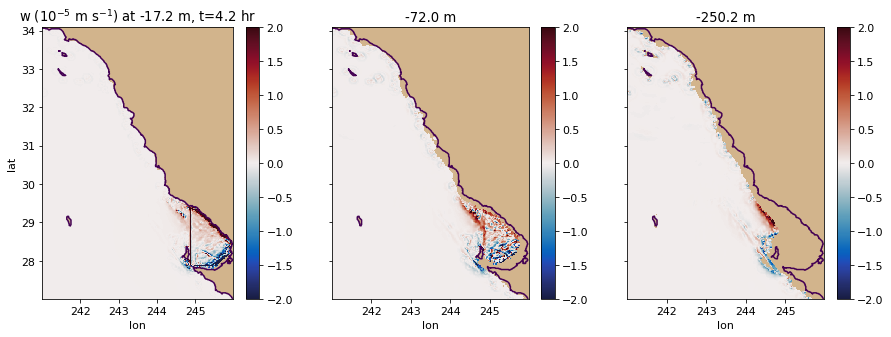

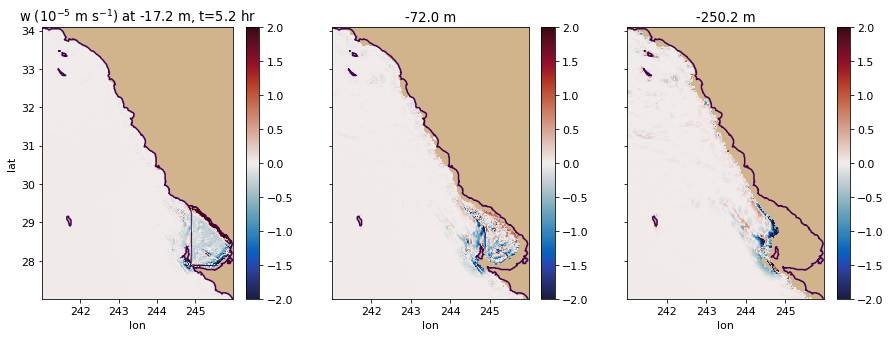

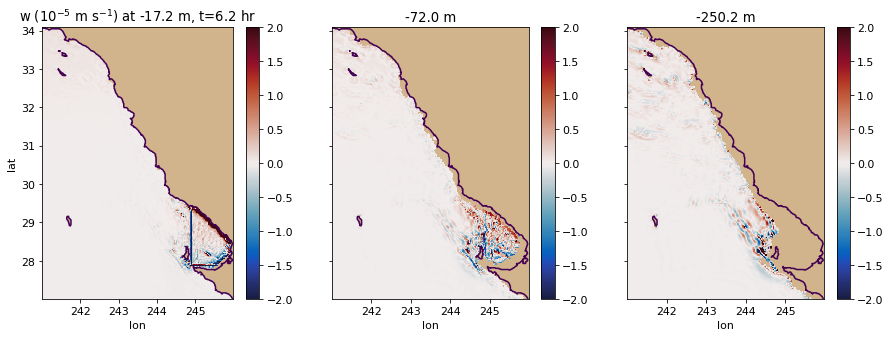

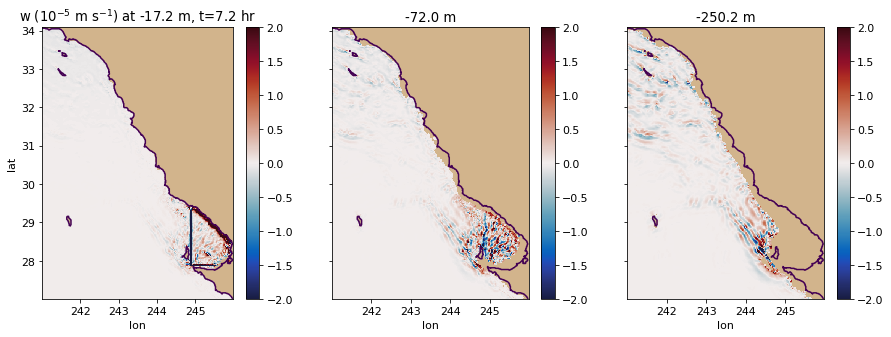

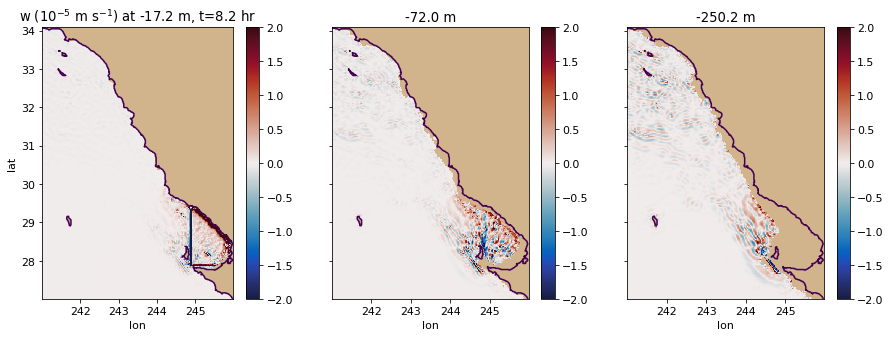

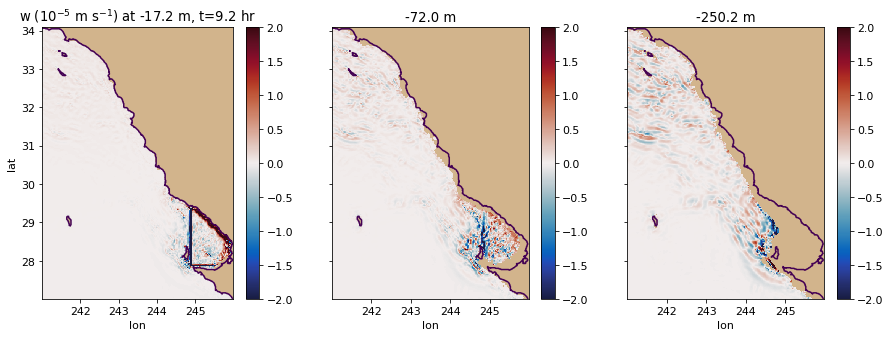

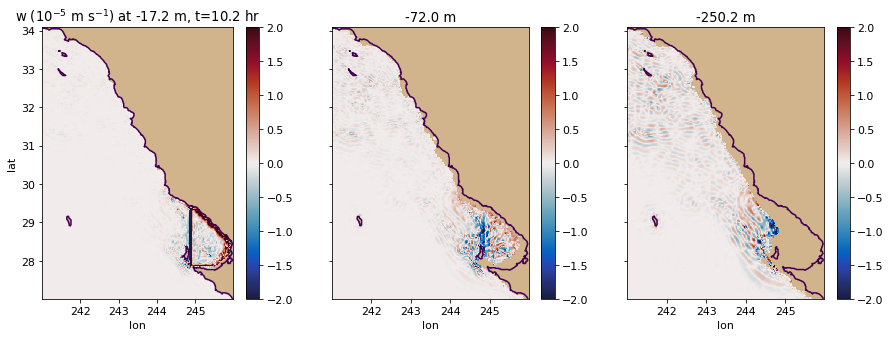

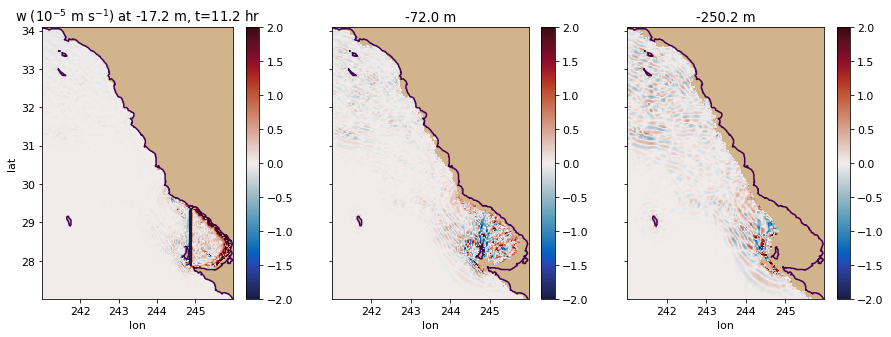

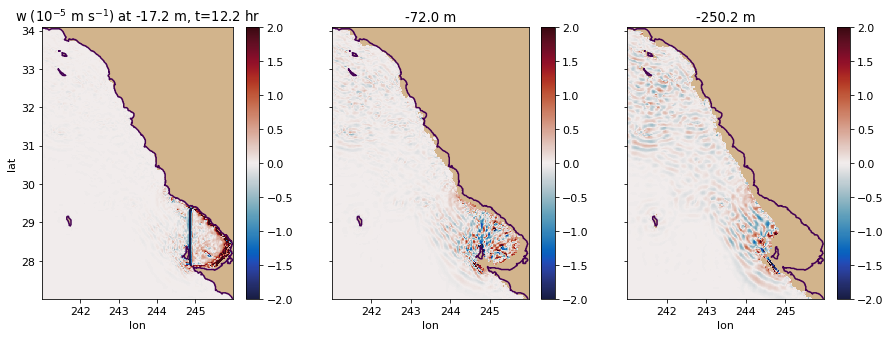

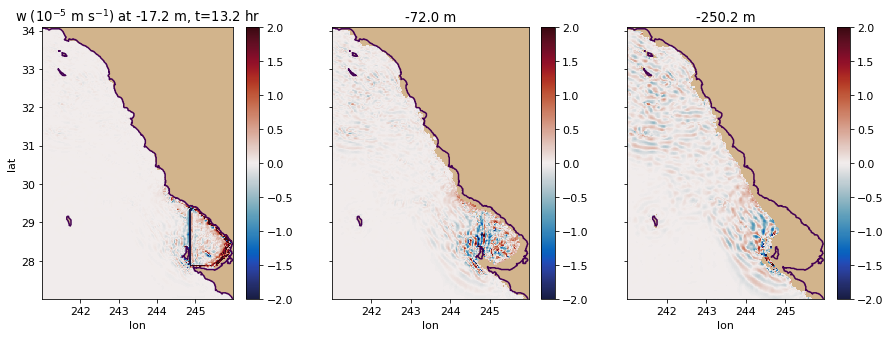

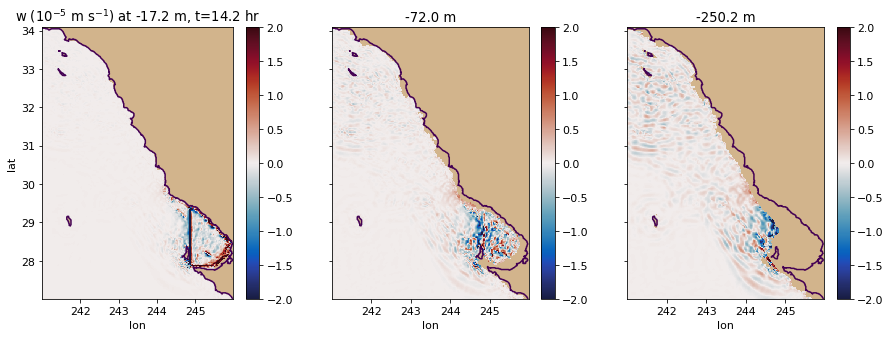

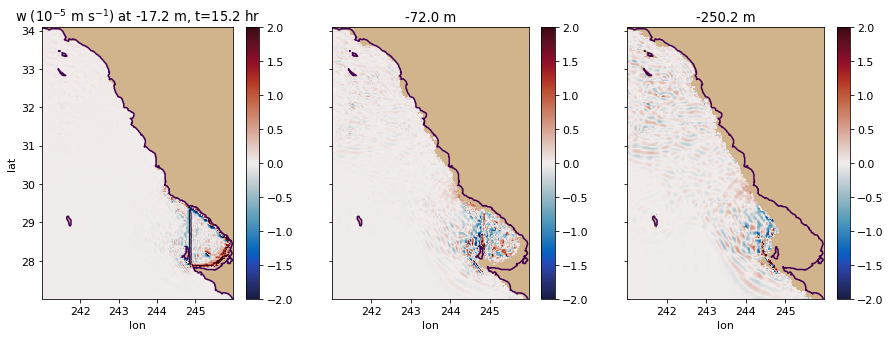

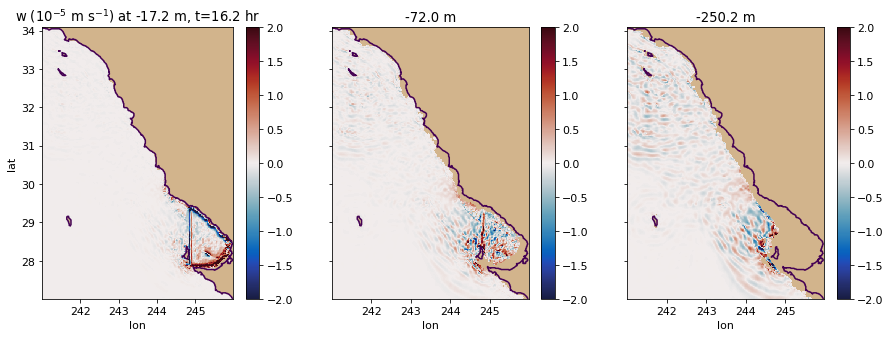

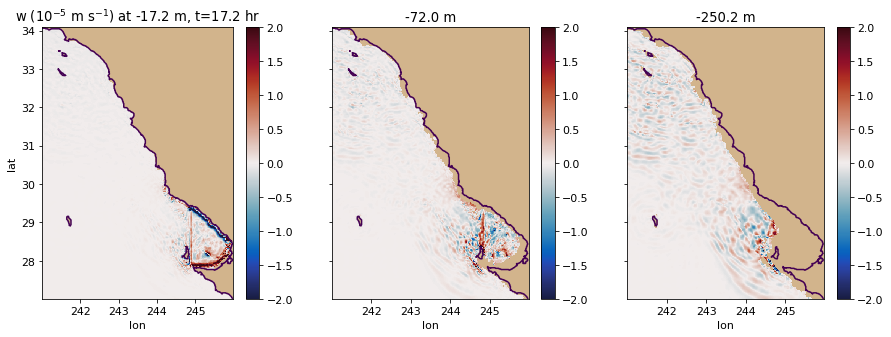

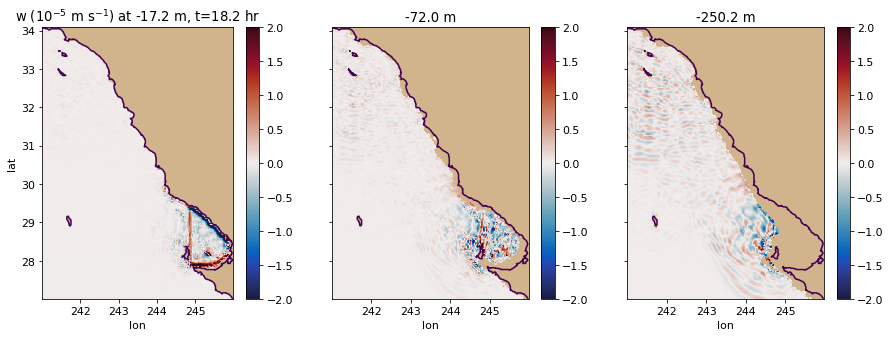

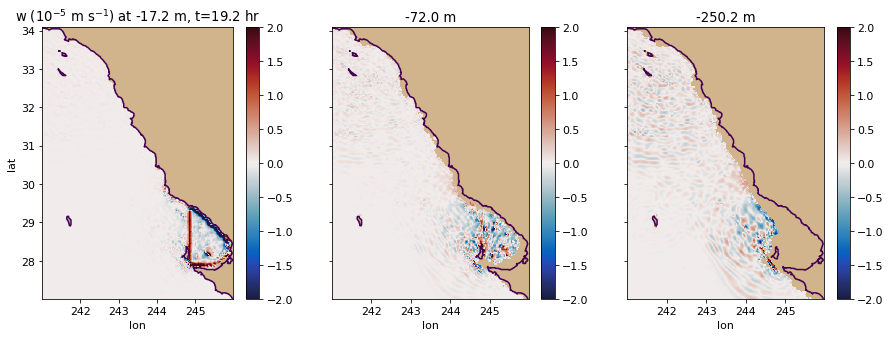

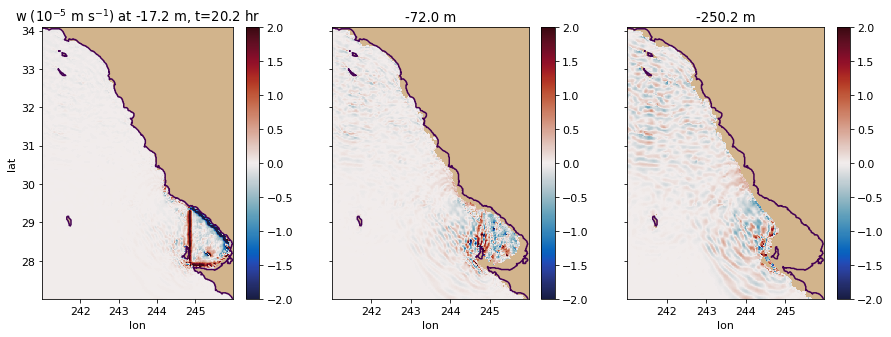

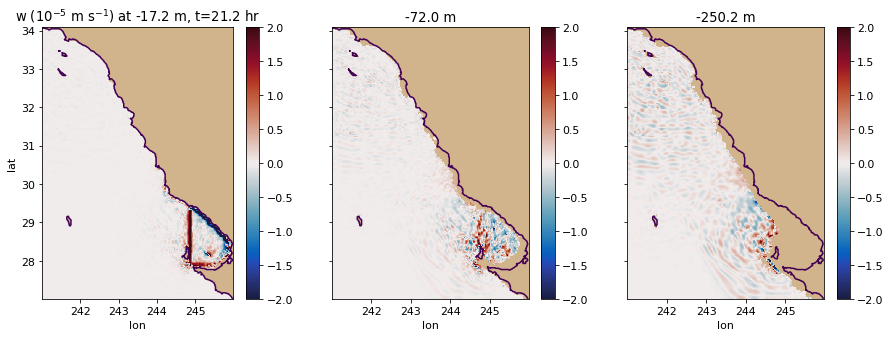

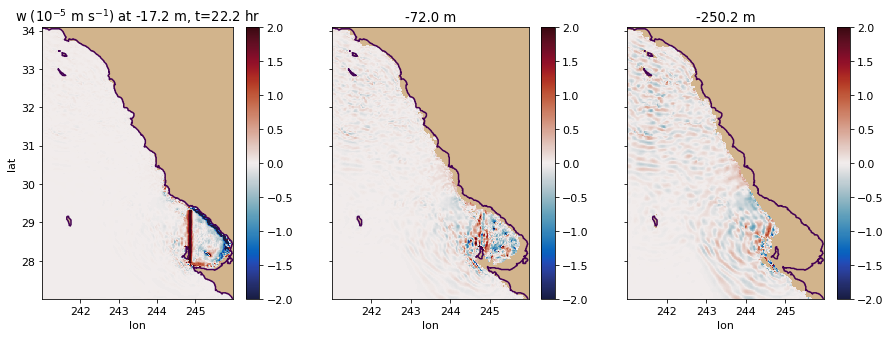

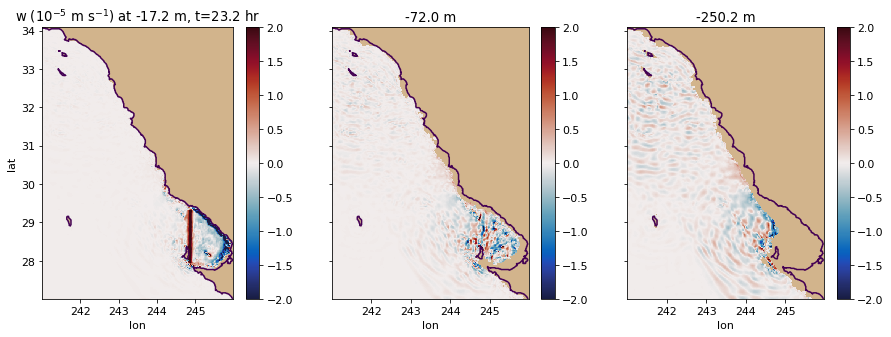

In [10]:
time_indexes = range(0,144,6)
zz = 8
zz2 = 21
zz3 = 43

for tt, ti in zip(time_indexes, time[time_indexes]):
        W = svb.get_snapshot_at_level(state_file1, tt, zz,'WVEL')
        W2 = svb.get_snapshot_at_level(state_file1, tt, zz2,'WVEL')
        W3 = svb.get_snapshot_at_level(state_file1, tt, zz3,'WVEL')
    
        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(15,5), sharey=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')
    
        pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(W*1E5,mask=mask[zz,:,:]),
                           cmap=cmo.cm.balance, vmin=-2, vmax=2)
        cb = plt.colorbar(pc, ax=ax0)
        ax0.contour(lon,lat,depth, levels=[0], color='k')
        pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(W2*1E5,mask=mask[zz2,:,:]),
                          cmap=cmo.cm.balance, vmin=-2, vmax=2)
        cb = plt.colorbar(pc, ax=ax1)
        ax1.contour(lon,lat,depth, levels=[0], color='k')
      
        pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(W3*1E5,mask=mask[zz3,:,:]),
                          cmap=cmo.cm.balance, vmin=-2, vmax=2)
        cb = plt.colorbar(pc, ax=ax2)
        ax2.contour(lon,lat,depth, levels=[0], color='k')
      
        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('lat')

        ax0.set_title('w ($10^{-5}$ m s$^{-1}$) at %1.1f m, t=%1.1f hr'%(Zl[zz],ti/3600))
        ax1.set_title('%1.1f m'%(Zl[Zind[zz2]]))
        ax2.set_title('%1.1f m'%(Zl[Zind[zz3]]))
        
        
        ax0.set_aspect(1)


### With quad drag coeff = 0.002

In [15]:
bathy_file2 = '/Volumes/KYUUBI/SVB/04_320x456x100/02_w_drag/gridGlob.nc'
state_file2 = '/Volumes/KYUUBI/SVB/04_320x456x100/02_w_drag/dynVarsGlob.nc'

with Dataset(bathy_file2, 'r') as nbl:
    lat = nbl.variables['Y'][:]
    lon = nbl.variables['X'][:]
    Z = nbl.variables['Z'][:]
    Zl = nbl.variables['Zl'][:]
    depth = nbl.variables['Depth'][:]
    # centers mask
    hFacC = nbl.variables['HFacC'][:]
    hfac = np.ma.masked_values(hFacC, 0)
    mask = np.ma.getmask(hfac)
    dep_masked = np.ma.masked_values(depth,0)
    mask_dep = np.ma.getmask(dep_masked)
with Dataset(state_file3, 'r') as nbl:
    time = nbl.variables['T'][:]

Text(0.5, 0, 'Time / hr')

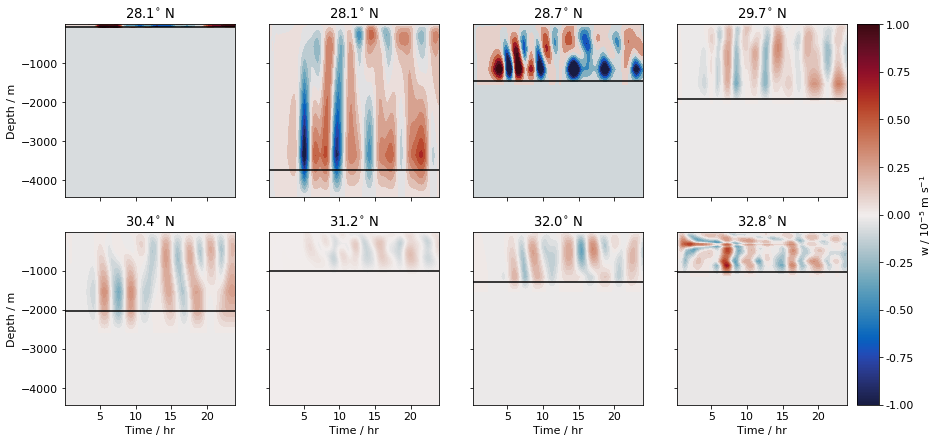

In [12]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(14,7),
                                                          sharex=True,sharey=True)
plt.rcParams.update({'font.size': 11})

with Dataset(state_file2, 'r') as nbl:
    wvel1h = nbl.variables['WVEL'][:,:,lat_inds[0], lon_inds[0]]
    time = nbl.variables['T'][:]
    wvel2h = nbl.variables['WVEL'][:,:,lat_inds[1], lon_inds[1]]
    wvel3h = nbl.variables['WVEL'][:,:,lat_inds[2], lon_inds[2]]
    wvel4h = nbl.variables['WVEL'][:,:,lat_inds[3], lon_inds[3]]
    wvel5h = nbl.variables['WVEL'][:,:,lat_inds[4], lon_inds[4]]
    wvel6h = nbl.variables['WVEL'][:,:,lat_inds[5], lon_inds[5]]
    wvel7h = nbl.variables['WVEL'][:,:,lat_inds[6], lon_inds[6]]
    wvel8h = nbl.variables['WVEL'][:,:,lat_inds[7], lon_inds[7]]

ax1.contourf(time/3600,Zl[Zind],np.transpose(wvel1h*1E5),20,vmin=-1, vmax=1,cmap=cmo.cm.balance)
ax2.contourf(time/3600,Zl[Zind],np.transpose(wvel2h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax3.contourf(time/3600,Zl[Zind],np.transpose(wvel3h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
cb = ax4.contourf(time/3600,Zl[Zind],np.transpose(wvel4h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax5.contourf(time/3600,Zl[Zind],np.transpose(wvel5h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax6.contourf(time/3600,Zl[Zind],np.transpose(wvel6h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax7.contourf(time/3600,Zl[Zind],np.transpose(wvel7h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax8.contourf(time/3600,Zl[Zind],np.transpose(wvel8h*1E5),20,cmap=cmo.cm.balance,vmin=-1, vmax=1)

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                 cax=cbar_ax, orientation='vertical', 
                 format='%1.2f',label='w / 10$^{-5}$ m s$^{-1}$')

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind,ind_lon, ax in zip(lat_inds, lon_inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])
    ax.axhline(-depth[ind,ind_lon], color='k')
ax1.set_ylabel('Depth / m')
ax5.set_ylabel('Depth / m')
ax5.set_xlabel('Time / hr')
ax6.set_xlabel('Time / hr')
ax7.set_xlabel('Time / hr')
ax8.set_xlabel('Time / hr')

Text(0.5, 0, 'Time / hr')

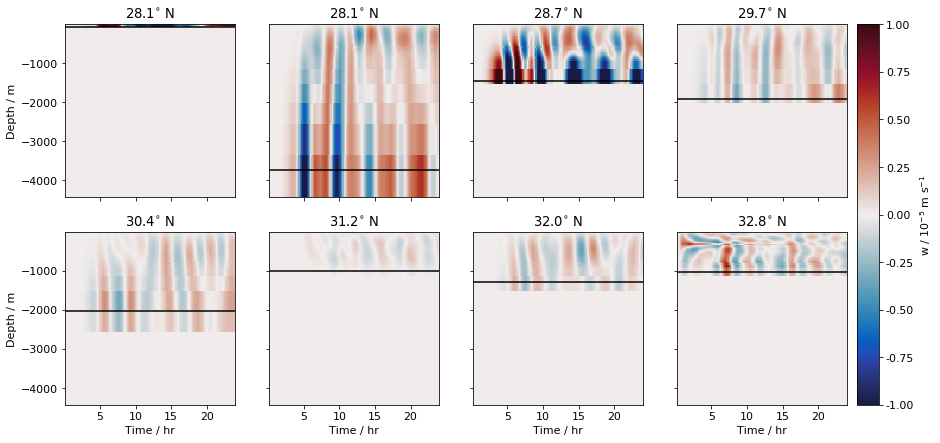

In [13]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(14,7),
                                                          sharex=True,sharey=True)
plt.rcParams.update({'font.size': 11})

ax1.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel1h*1E5),vmin=-1, vmax=1,cmap=cmo.cm.balance)
ax2.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel2h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax3.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel3h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
cb = ax4.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel4h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax5.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel5h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax6.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel6h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax7.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel7h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)
ax8.pcolormesh(time/3600,Zl[Zind],np.transpose(wvel8h*1E5),cmap=cmo.cm.balance,vmin=-1, vmax=1)

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                 cax=cbar_ax, orientation='vertical', 
                 format='%1.2f',label='w / 10$^{-5}$ m s$^{-1}$')

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind,ind_lon, ax in zip(lat_inds, lon_inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])
    ax.axhline(-depth[ind,ind_lon], color='k')
ax1.set_ylabel('Depth / m')
ax5.set_ylabel('Depth / m')
ax5.set_xlabel('Time / hr')
ax6.set_xlabel('Time / hr')
ax7.set_xlabel('Time / hr')
ax8.set_xlabel('Time / hr')

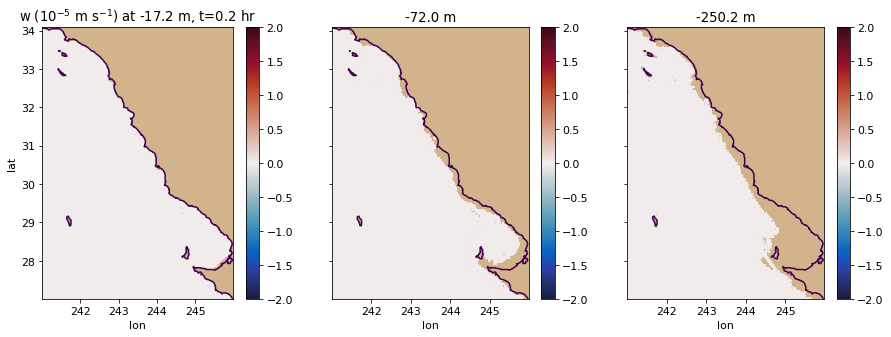

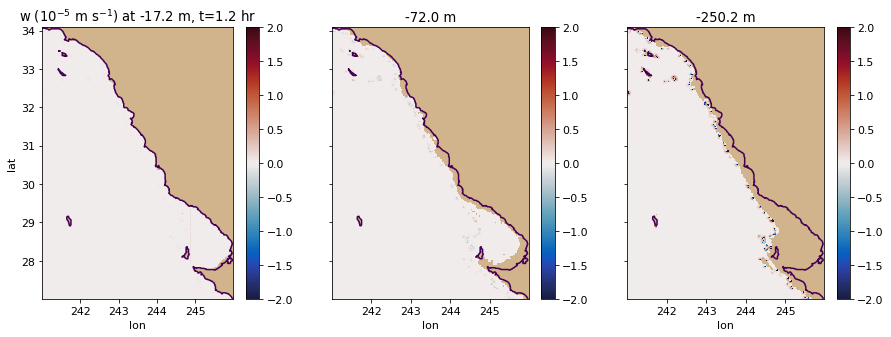

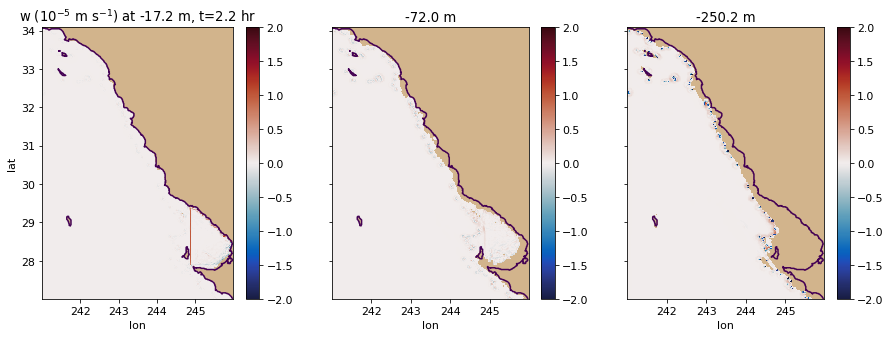

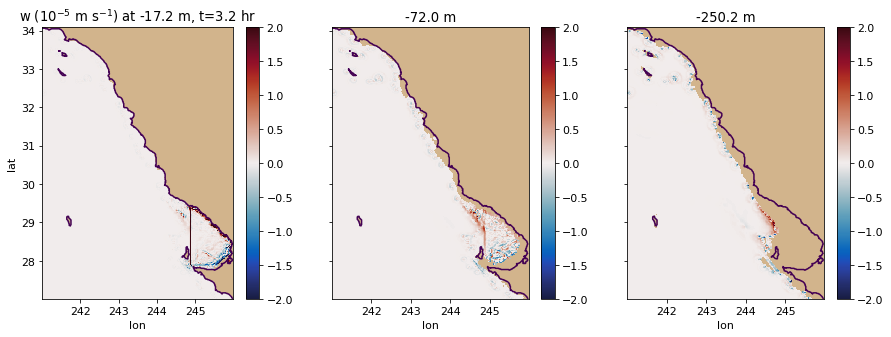

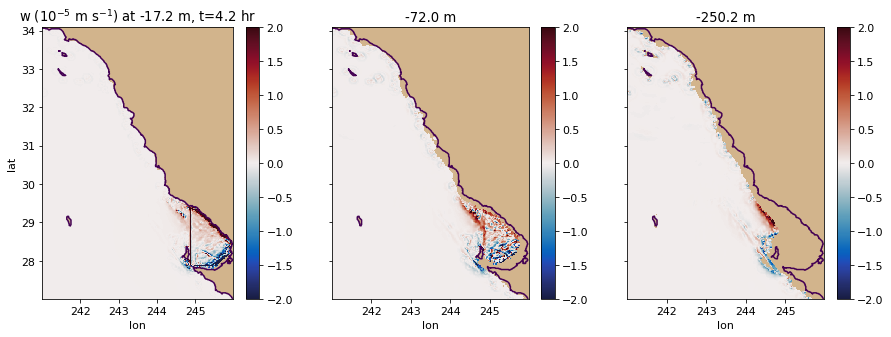

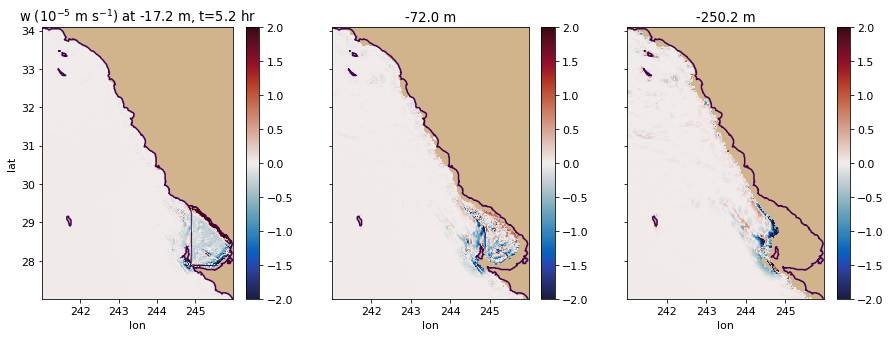

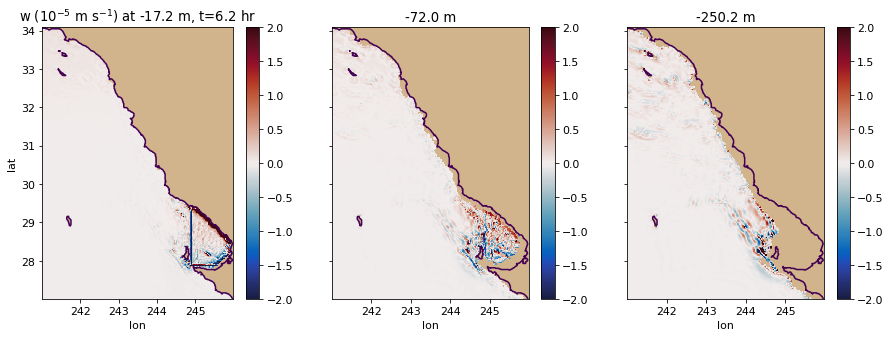

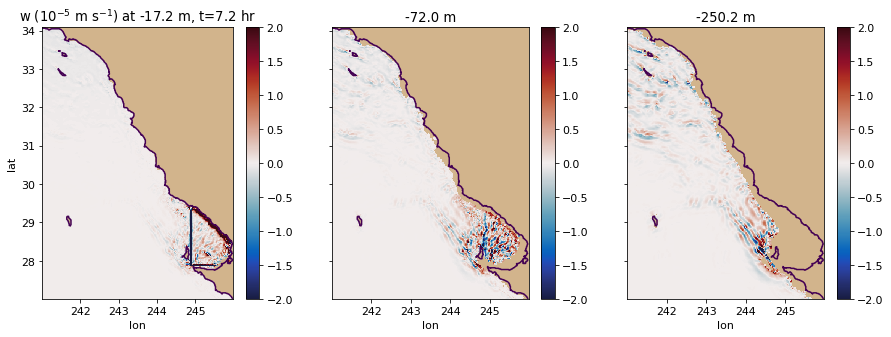

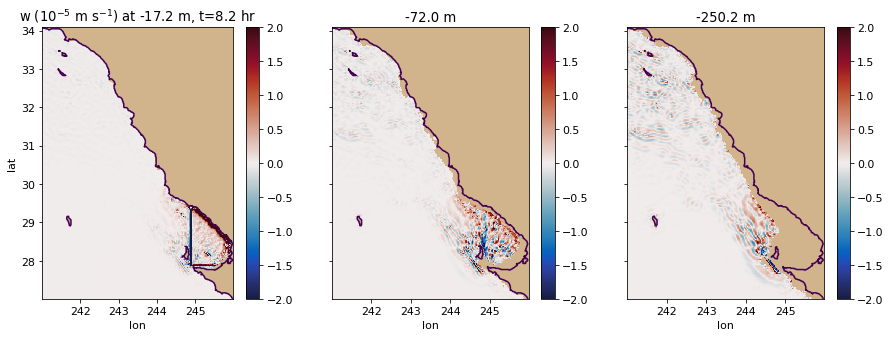

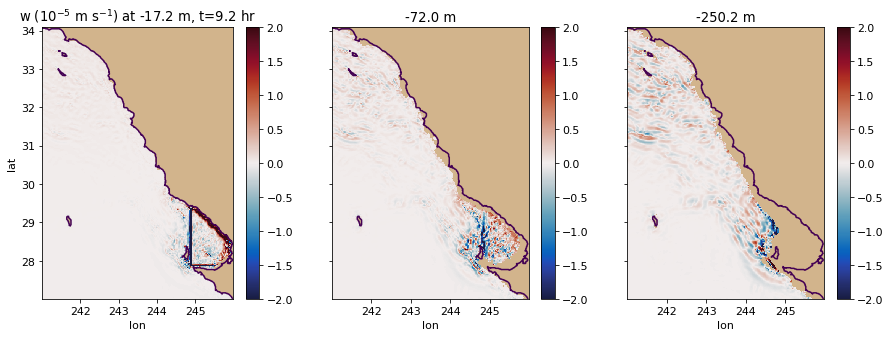

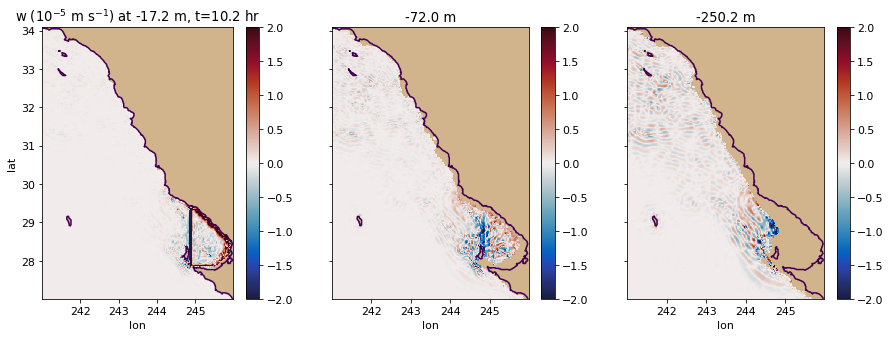

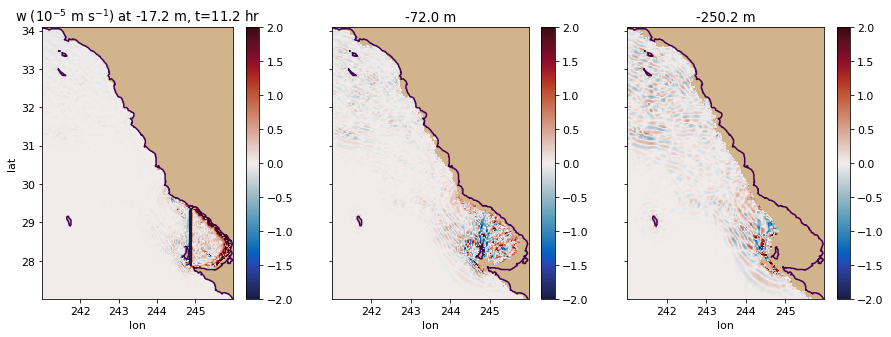

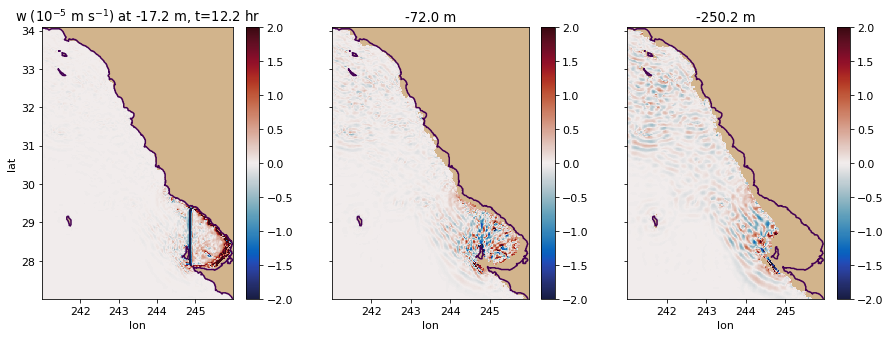

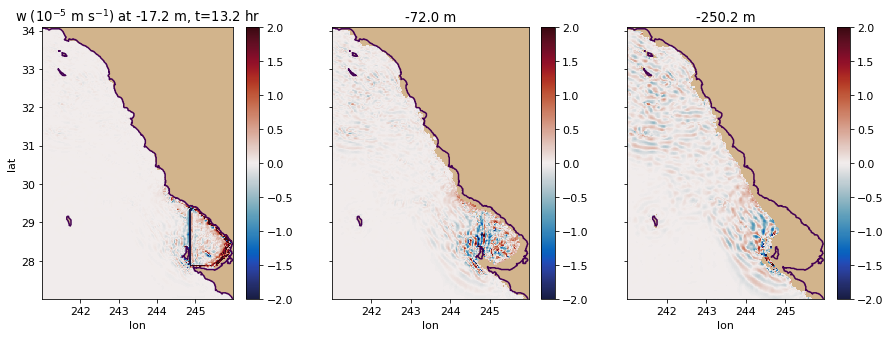

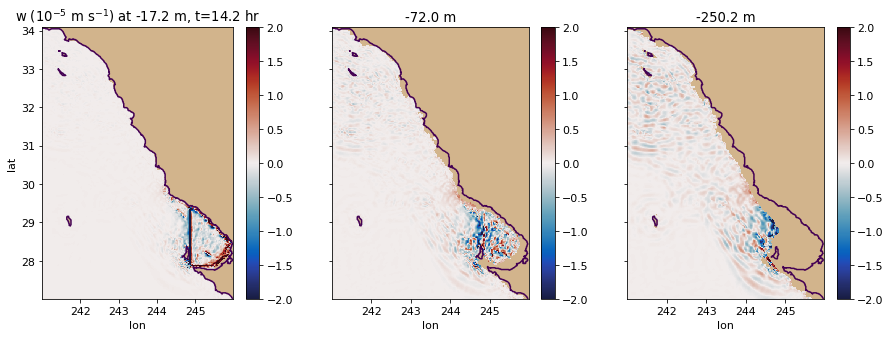

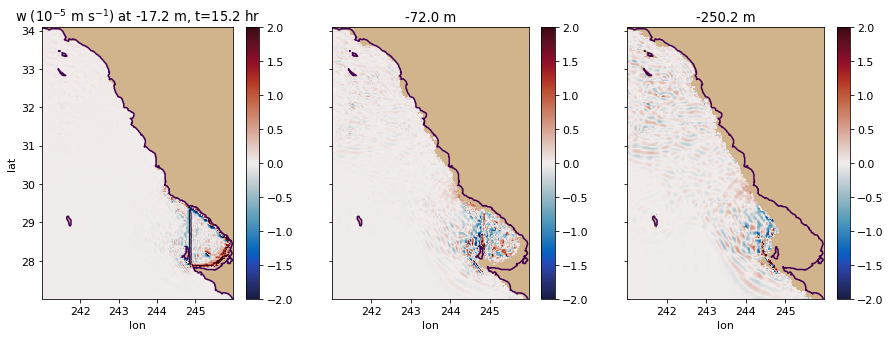

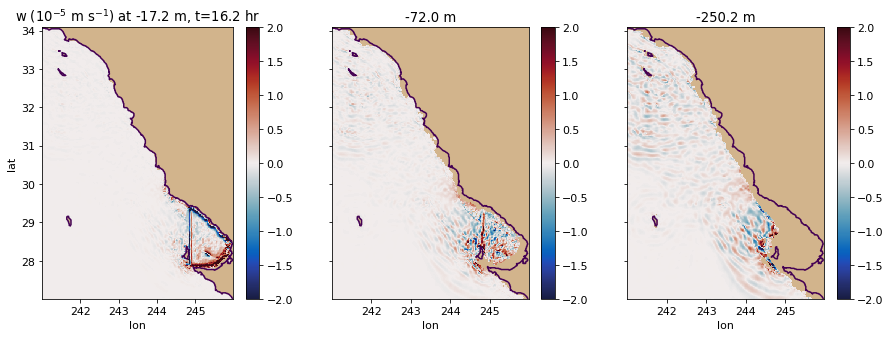

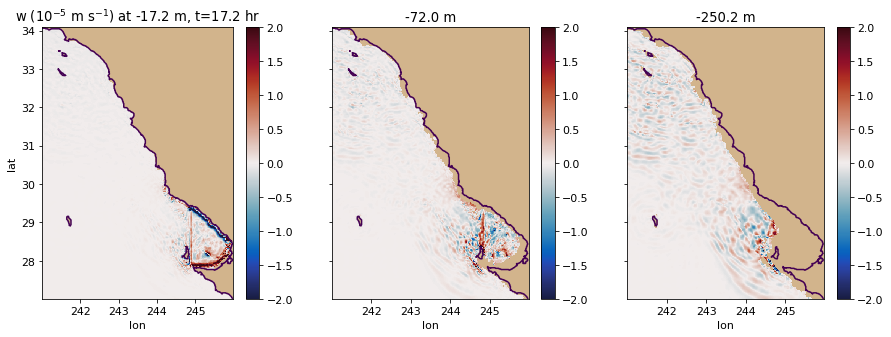

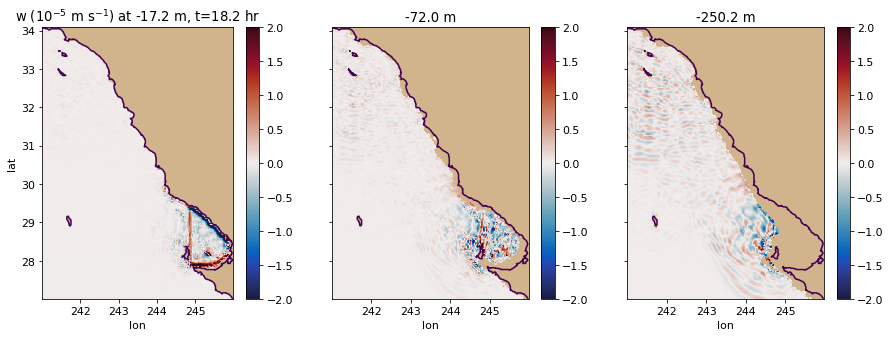

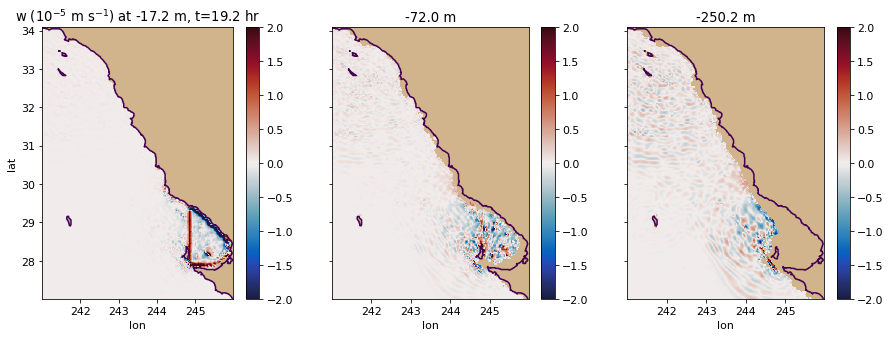

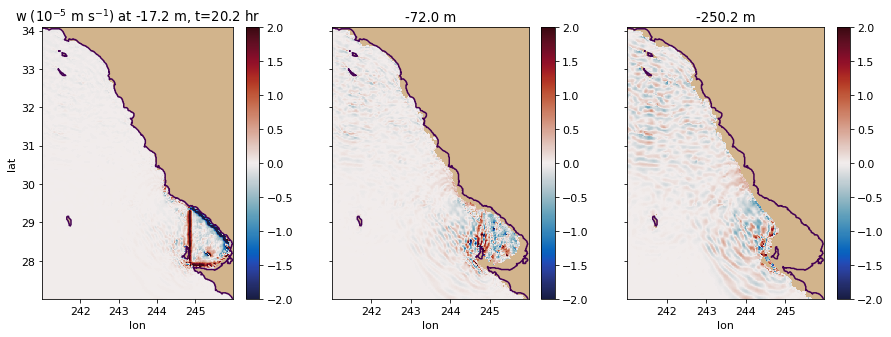

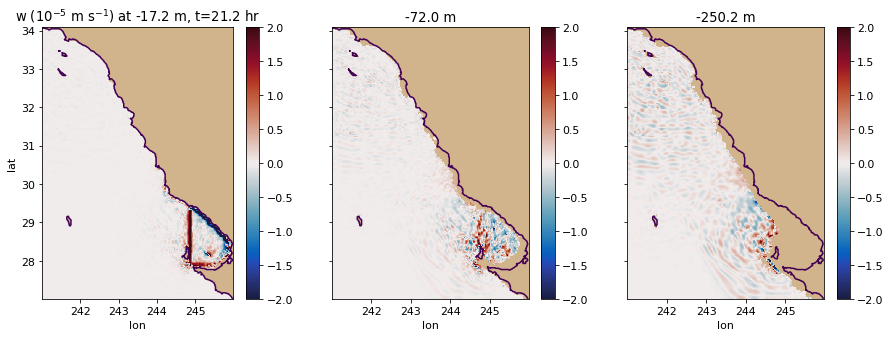

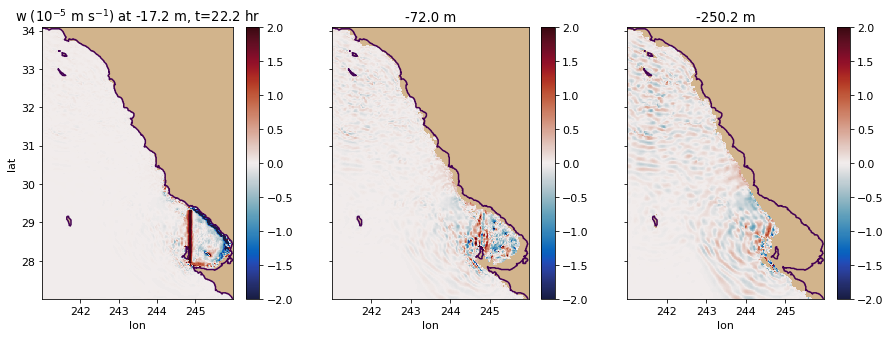

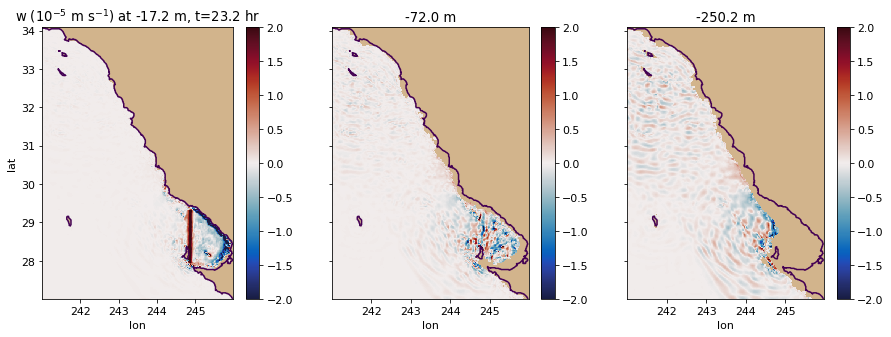

In [17]:
time_indexes = range(0,144,6)
zz = 8
zz2 = 21
zz3 = 43

for tt, ti in zip(time_indexes, time[time_indexes]):
        W = svb.get_snapshot_at_level(state_file2, tt, zz,'WVEL')
        W2 = svb.get_snapshot_at_level(state_file2, tt, zz2,'WVEL')
        W3 = svb.get_snapshot_at_level(state_file2, tt, zz3,'WVEL')
    
        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(15,5), sharey=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')
    
        pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(W*1E5,mask=mask[zz,:,:]),
                           cmap=cmo.cm.balance, vmin=-2, vmax=2)
        cb = plt.colorbar(pc, ax=ax0)
        ax0.contour(lon,lat,depth, levels=[0], color='k')
        pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(W2*1E5,mask=mask[zz2,:,:]),
                          cmap=cmo.cm.balance, vmin=-2, vmax=2)
        cb = plt.colorbar(pc, ax=ax1)
        ax1.contour(lon,lat,depth, levels=[0], color='k')
      
        pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(W3*1E5,mask=mask[zz3,:,:]),
                          cmap=cmo.cm.balance, vmin=-2, vmax=2)
        cb = plt.colorbar(pc, ax=ax2)
        ax2.contour(lon,lat,depth, levels=[0], color='k')
      
        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('lat')

        ax0.set_title('w ($10^{-5}$ m s$^{-1}$) at %1.1f m, t=%1.1f hr'%(Zl[zz],ti/3600))
        ax1.set_title('%1.1f m'%(Zl[zz2]))
        ax2.set_title('%1.1f m'%(Zl[zz3]))
        
        
        ax0.set_aspect(1)
        plt.show()

### Animations

In [13]:
def plot_field_w(ax,tt,lon,lat,eta,time,mask,zind,cmap=cmo.cm.balance,vmin=-0.6, vmax=0.6):
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat, np.ma.masked_array(eta,mask=mask[zind,:,:]),
                       cmap=cmap, vmin=vmin, vmax=vmax)
    ax.contour(lon,lat,depth, levels=[0], color='k')
      
    if zind>30:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.88, 0.125, 0.022, 0.755]) 
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.2f', label='$w$ ($10^{-5}$ m s$^{-1}$)')
    
    ax.set_title('z=%1.1f m, t=%1.1f h'%(Zl[zind],time[tt]/3600))
    ax.set_aspect(1)
    return(ax)

def init():
    tt=12
    W = svb.get_snapshot_at_level(state_file3, tt, zz,'W')
    W2 = svb.get_snapshot_at_level(state_file3, tt, zz2,'W')
    W3 = svb.get_snapshot_at_level(state_file3, tt, zz3,'W')
    
    axx= plot_field_w(ax1,tt,lon,lat,W*1E5,time,mask,zz,cmap=cmap, vmin=-2, vmax=2)
    axxx = plot_field_w(ax2,tt,lon,lat,W2*1E5,time,mask,zz2,cmap=cmap, vmin=-2, vmax=2)
    axxxx = plot_field_w(ax3,tt,lon,lat,W*1E5,time,mask,zz3,cmap=cmap,  vmin=-2, vmax=2)
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax3.set_xlabel('lon')
    ax2.set_yticks([])
    ax3.set_yticks([])
def animate(t):
    tt=t+12
    W = svb.get_snapshot_at_level(state_file3, tt, zz,'W')
    W2 = svb.get_snapshot_at_level(state_file3, tt, zz2,'W')
    W3 = svb.get_snapshot_at_level(state_file3, tt, zz3,'W')
    
    axx= plot_field_w(ax1,tt,lon,lat,W*1E5,time,mask,zz,cmap=cmap, vmin=-2, vmax=2)
    axxx = plot_field_w(ax2,tt,lon,lat,W2*1E5,time,mask,zz2,cmap=cmap, vmin=-2, vmax=2)
    axxxx = plot_field_w(ax3,tt,lon,lat,W*1E5,time,mask,zz3,cmap=cmap,  vmin=-2, vmax=2)
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax3.set_xlabel('lon')
    ax2.set_yticks([])
    ax3.set_yticks([])

In [14]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

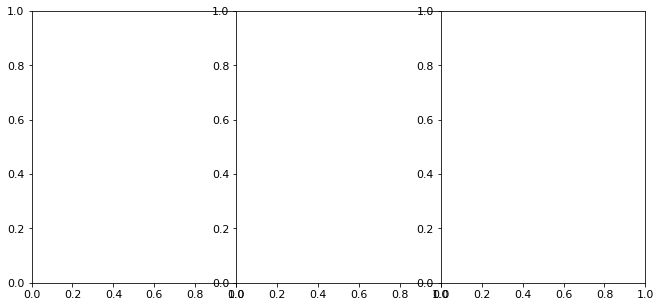

In [15]:
cmap=cmo.cm.balance
zz = 8
zz2 = 21
zz3 = 43

fig = plt.figure(figsize=(11,5))
gs = GridSpec(1,3, width_ratios=[1,1,1], wspace=0.0)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# Uncomment lines below to run and save animation
#anim = animation.FuncAnimation(fig, animate, init_func=init,blit=False, frames=132, repeat=False)
#anim.save('w_02_100xsmooth.mp4', writer=writer)